In [29]:
import pandas as pd

class Data:

    def __init__(self, country: str , skiprows: int = 3) -> None:
        self.skiprows = skiprows
        self.country = country
    
    def make_filepath(country: str) -> str:
        filepath = "../data/"+ country + "_data.csv"
        return filepath

    def read(filepath: str, skiprows: int=3) -> pd.core.frame.DataFrame:
        data = pd.read_csv(filepath,skiprows=skiprows)
        return data
    
    def clean_data(df: pd.core.frame.DataFrame, columns_to_drop: list) -> pd.core.frame.DataFrame:
        df = df.drop(columns_to_drop, axis = 1)
        df = df.T.reset_index()
        df.columns = df.iloc[0]
        df = df[1:]
        df = df.rename(columns={"Indicator Name":"Year"})
        df = df[:-1].convert_dtypes()
        return df

filepath = Data.make_filepath("ukraine")
ukraine_data = Data.read(filepath)
ukraine_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Ukraine,UKR,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.160253e+00,4.504246e+00,4.116614e+00,3.867030e+00,3.843201e+00,NaN,NaN,NaN
1,Ukraine,UKR,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.300000e+02,NaN,NaN,NaN,2.000000e+03,2.000000e+03,1.000000e+00,NaN,NaN
2,Ukraine,UKR,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,5.024630e+01,5.369458e+01,5.418719e+01,5.242719e+01,5.362319e+01,5.700483e+01,5.603865e+01,5.458937e+01,NaN,NaN
3,Ukraine,UKR,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.678742e-02,1.790598e-03,1.489699e-02,-3.044413e-02,2.316779e-02,8.929265e-02,7.109492e-02,-2.480771e-02,NaN,NaN
4,Ukraine,UKR,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.494819e+09,1.122991e+09,1.213574e+09,1.213060e+09,1.165829e+09,1.175952e+09,1.283586e+09,8.880654e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,Ukraine,UKR,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.667041e+01,1.668249e+01,1.669429e+01,1.670349e+01,1.671384e+01,1.672420e+01,1.673455e+01,NaN,NaN,NaN
1474,Ukraine,UKR,Urban land area where elevation is below 5 met...,AG.LND.EL5M.UR.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.227813e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475,Ukraine,UKR,Land under cereal production (hectares),AG.LND.CREL.HA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.439952e+07,1.402040e+07,1.407680e+07,1.425780e+07,1.496117e+07,1.498639e+07,1.565069e+07,1.160258e+07,NaN,NaN
1476,Ukraine,UKR,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.165323e+01,7.166531e+01,7.161920e+01,7.133069e+01,7.129962e+01,7.129962e+01,7.129962e+01,NaN,NaN,NaN


In [30]:
# cleaning the data
ukraine_columns_to_drop = ["Country Name", "Country Code", "Indicator Code"]
ukraine_data = Data.clean_data(ukraine_data, ukraine_columns_to_drop)
ukraine_data

,Year,"Intentional homicides (per 100,000 people)","Internally displaced persons, new displacement associated with disasters (number of cases)","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Estimate,High-technology exports (current US$),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),...,Other manufacturing (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current LCU)","Manufacturing, value added (annual % growth)","Industry (including construction), value added per worker (constant 2015 US$)",Forest area (% of land area),Urban land area where elevation is below 5 meters (sq. km),Land under cereal production (hectares),Agricultural land (% of land area),"Agricultural machinery, tractors"
1,1960,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1961,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1962,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1963,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,1964,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2019,4.116614,<NA>,53.623188,0.023168,1165828545,21.272418,5.237231,10.574805,13.486762,...,38.421766,22.58042,898068000000,0.86196,4742.081128,16.713842,<NA>,14961169,71.29962,<NA>
61,2020,3.86703,2000,57.004829,0.089293,1175952420,19.35361,5.550936,17.539133,12.127078,...,42.066689,20.799943,878179000000,-5.76368,<NA>,16.724197,<NA>,14986392,71.29962,<NA>
62,2021,3.843201,2000,56.038647,0.071095,1283585848,<NA>,<NA>,<NA>,<NA>,...,42.066689,23.153714,1262074000000,1.979322,<NA>,16.734553,<NA>,15650689,71.29962,<NA>
63,2022,<NA>,1,54.589371,-0.024808,888065427,<NA>,<NA>,<NA>,<NA>,...,<NA>,19.243857,998954000000,-43.1,<NA>,<NA>,<NA>,11602583,<NA>,<NA>


In [31]:
# selecting and modifying the data
ukraine_data["Year"]=ukraine_data["Year"].astype(int)
ukraine_data = ukraine_data.tail(30)
ukraine_data

,Year,"Intentional homicides (per 100,000 people)","Internally displaced persons, new displacement associated with disasters (number of cases)","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Estimate,High-technology exports (current US$),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),...,Other manufacturing (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (current LCU)","Manufacturing, value added (annual % growth)","Industry (including construction), value added per worker (constant 2015 US$)",Forest area (% of land area),Urban land area where elevation is below 5 meters (sq. km),Land under cereal production (hectares),Agricultural land (% of land area),"Agricultural machinery, tractors"
35,1994,8.202011,<NA>,<NA>,<NA>,<NA>,55.234302,0.567389,7.612575,0.786428,...,<NA>,42.629192,5131570000,-37.516461,3591.225363,16.170536,<NA>,12060817,72.255113,498743
36,1995,8.630809,<NA>,<NA>,<NA>,<NA>,53.22955,1.512459,4.753793,3.768162,...,<NA>,38.163823,20805550000,-11.20043,3234.449209,16.211271,<NA>,12880700,72.241305,469301
37,1996,9.672811,<NA>,53.0,-0.32485,<NA>,55.28134,0.855514,8.727354,4.152576,...,<NA>,33.781082,27538000000,-4.024348,3107.679784,16.252007,<NA>,11664800,72.218866,441657
38,1997,8.433435,<NA>,<NA>,<NA>,<NA>,45.376114,2.949339,10.213086,5.486276,...,<NA>,30.480373,28458000000,-2.980213,3143.181107,16.292742,<NA>,13811700,72.243031,405784
39,1998,8.43286,<NA>,52.736317,-0.240637,<NA>,40.749856,2.711065,6.898735,5.886635,...,<NA>,30.628795,31423000000,0.0,3341.043577,16.333477,<NA>,12183048,71.823595,374166
40,1999,8.617173,<NA>,<NA>,<NA>,<NA>,37.029139,3.196201,8.846104,6.623786,...,<NA>,32.018062,41765000000,5.500007,3611.719465,16.374212,<NA>,11963131,71.550876,347247
41,2000,9.038507,<NA>,38.805969,-0.610851,<NA>,39.928927,1.606716,6.767766,6.95509,...,<NA>,31.650277,55745000000,12.799997,4008.903702,16.414948,228.229594,12207514,71.469751,318900
42,2001,10.025915,<NA>,<NA>,<NA>,<NA>,37.347946,1.171441,6.644353,9.283337,...,<NA>,29.907896,63158000000,12.592015,4643.997848,16.421507,<NA>,14246649,71.433503,413625
43,2002,8.954377,<NA>,41.791046,-0.519449,<NA>,33.275516,1.146091,8.993259,9.111186,...,<NA>,30.215514,70746000000,10.618879,4942.759083,16.42835,<NA>,13801680,71.453723,404259
44,2003,8.488489,<NA>,39.303482,-0.589257,<NA>,30.532679,1.355275,7.825693,7.13435,...,<NA>,30.426709,84390000000,16.956666,5039.847742,16.434909,<NA>,12067200,71.382953,390838


In [32]:
# checking the number of null values in each column
ukraine_data.isna().sum()

0
Year                                                                                           0
Intentional homicides (per 100,000 people)                                                     6
Internally displaced persons, new displacement associated with disasters (number of cases)    24
Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval              6
Voice and Accountability: Estimate                                                             6
                                                                                              ..
Forest area (% of land area)                                                                   2
Urban land area where elevation is below 5 meters (sq. km)                                    28
Land under cereal production (hectares)                                                        1
Agricultural land (% of land area)                                                             2
Agricultural machinery, trac

In [33]:
# sorting the data according to no of null values in every column, in ascending order
sorted_cols = ukraine_data.isna().sum().to_dict()
sorted(sorted_cols.items(), key=lambda x: x[1])

[('Year', 0),
 ('Population in urban agglomerations of more than 1 million', 0),
 ('Net migration', 0),
 ('Population in largest city', 0),
 ('Population in urban agglomerations of more than 1 million (% of total population)',
  0),
 ('Women Business and the Law Index Score (scale 1-100)', 0),
 ('Population in the largest city (% of urban population)', 0),
 ('Travel services (% of commercial service imports)', 1),
 ('Merchandise imports (current US$)', 1),
 ('Insurance and financial services (% of commercial service imports)', 1),
 ('Urban population', 1),
 ('Rural population', 1),
 ('Population, male', 1),
 ('Age dependency ratio, old (% of working-age population)', 1),
 ('Population ages 80 and above, female (% of female population)', 1),
 ('Population ages 70-74, female (% of female population)', 1),
 ('Population ages 65 and above, male', 1),
 ('Population ages 65-69, female (% of female population)', 1),
 ('Population ages 55-59, female (% of female population)', 1),
 ('Population

In [34]:
# selecting the columns we want to analyse
selected_ukraine_data = ukraine_data[["Year","GDP growth (annual %)",'GDP (constant 2015 US$)',"Portfolio investment, net (BoP, current US$)","Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (national estimate)","Population growth (annual %)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"]]
mean_value = selected_ukraine_data["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].mean() 
selected_ukraine_data["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].fillna(value=mean_value, inplace=True)
selected_ukraine_data

/tmp/ipykernel_1924617/293080659.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_ukraine_data["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].fillna(value=mean_value, inplace=True)
/tmp/ipykernel_1924617/293080659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ukr

,Year,GDP growth (annual %),GDP (constant 2015 US$),"Portfolio investment, net (BoP, current US$)","Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (national estimate)",Population growth (annual %),"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
35,1994,-22.9,87877436947.992401,<NA>,891.187748,<NA>,-0.495291,88.543221
36,1995,-12.2,77156389639.6884,-4000000,376.746175,5.62,-0.790072,88.543221
37,1996,-10.0,69440750675.719498,-198000000,80.325501,7.65,-0.8872,88.543221
38,1997,-3.0,67357528156.542603,-1603000000,15.940599,8.93,-0.911347,88.543221
39,1998,-1.9,66077735120.125702,-47000000,10.577161,11.32,-0.893601,88.543221
40,1999,-0.2,65945579649.815102,86000000,22.683672,11.864,-0.942718,88.543221
41,2000,5.9,69836368849.318298,-138000000,28.203097,11.707,-1.006579,88.543221
42,2001,8.8,75981969310.622894,45000000,11.958809,11.061,-1.050921,88.543221
43,2002,5.339647,80039138412.886093,-337000000,0.757421,10.136,-0.949639,88.543221
44,2003,9.51661,87656150954.438507,-867000000,5.179678,9.057,-0.811376,88.543221


In [35]:
selected_ukraine_data.shape

(30, 8)

In [36]:
selected_ukraine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Year,30.0,2008.5,8.803408,1994.0,2001.25,2008.5,2015.75,2023.0
GDP growth (annual %),29.0,-1.06614,9.713789,-29.1,-3.752804,2.359972,5.339647,11.795353
GDP (constant 2015 US$),29.0,92768898700.83429,16609304021.834484,65945579649.815102,77156389639.6884,97995502972.089996,102020662582.214996,120217318405.035995
"Portfolio investment, net (BoP, current US$)",28.0,-1390714285.714286,2574342589.321741,-8787000000.0,-2249250000.0,-617000000.0,8250000.0,2700000000.0
"Inflation, consumer prices (annual %)",29.0,58.175017,174.382909,-0.238949,9.048068,12.071856,20.183637,891.187748
"Unemployment, total (% of total labor force) (national estimate)",27.0,8.729296,1.637538,5.62,7.5895,8.84,9.4875,11.864
Population growth (annual %),29.0,-1.093441,2.543472,-14.257037,-0.8872,-0.596871,-0.443841,-0.227691
"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",30.0,88.543221,0.0,88.543221,88.543221,88.543221,88.543221,88.543221


In [37]:
import seaborn as sns

['Year', 'GDP growth (annual %)', 'GDP (constant 2015 US$)', 'Portfolio investment, net (BoP, current US$)', 'Inflation, consumer prices (annual %)', 'Unemployment, total (% of total labor force) (national estimate)', 'Population growth (annual %)', 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)']


[None]

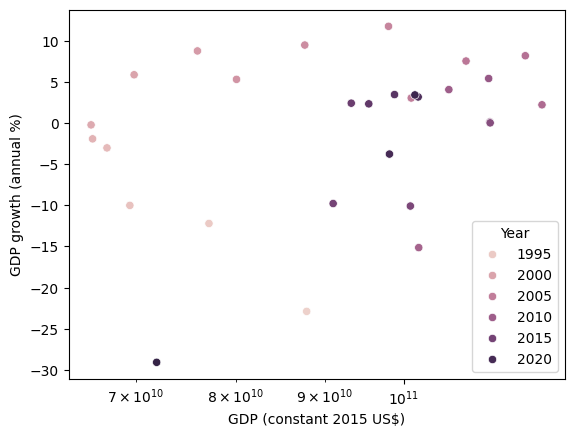

In [38]:
columns = list(selected_ukraine_data.columns)
print(columns)

grid = sns.scatterplot(x="GDP (constant 2015 US$)",y='GDP growth (annual %)',hue='Year',data=selected_ukraine_data)
grid.set(xscale="log")

<Axes: xlabel='Portfolio investment, net (BoP, current US$)', ylabel='GDP growth (annual %)'>

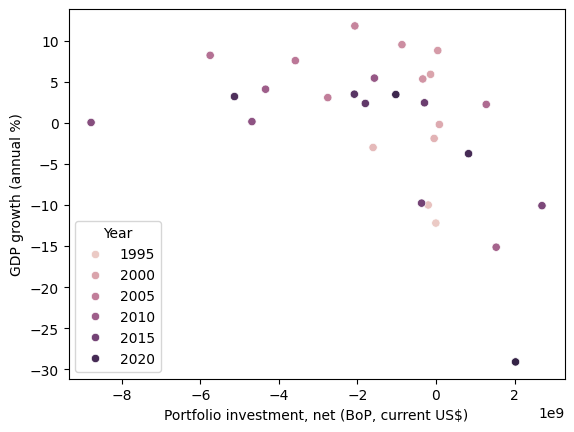

In [39]:
sns.scatterplot(x="Portfolio investment, net (BoP, current US$)",y='GDP growth (annual %)',hue='Year',data=selected_ukraine_data)


<Axes: xlabel='Inflation, consumer prices (annual %)', ylabel='GDP growth (annual %)'>

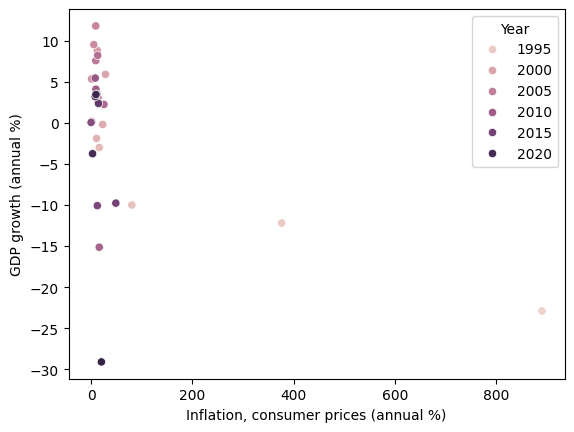

In [40]:
sns.scatterplot(x='Inflation, consumer prices (annual %)',y='GDP growth (annual %)',hue='Year',data=selected_ukraine_data)


<Axes: xlabel='Unemployment, total (% of total labor force) (national estimate)', ylabel='GDP growth (annual %)'>

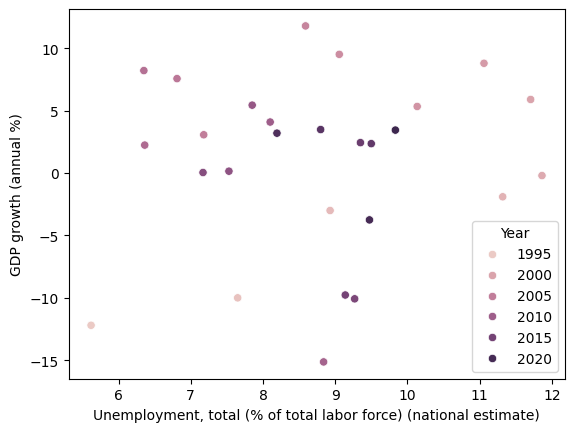

In [41]:
sns.scatterplot(x='Unemployment, total (% of total labor force) (national estimate)',y='GDP growth (annual %)',hue='Year',data=selected_ukraine_data)


<Axes: xlabel='Population growth (annual %)', ylabel='GDP growth (annual %)'>

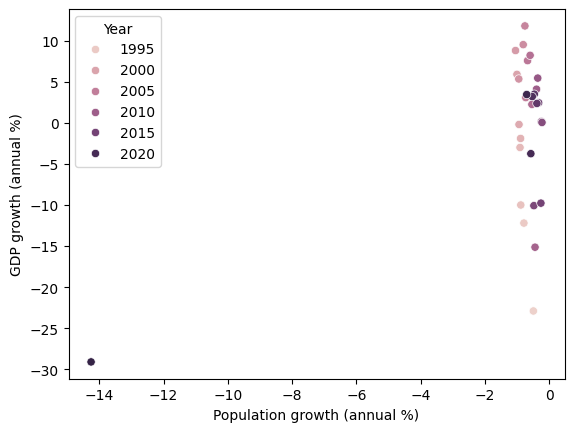

In [42]:
sns.scatterplot(x='Population growth (annual %)',y='GDP growth (annual %)',hue='Year',data=selected_ukraine_data)


<Axes: xlabel='Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)', ylabel='GDP growth (annual %)'>

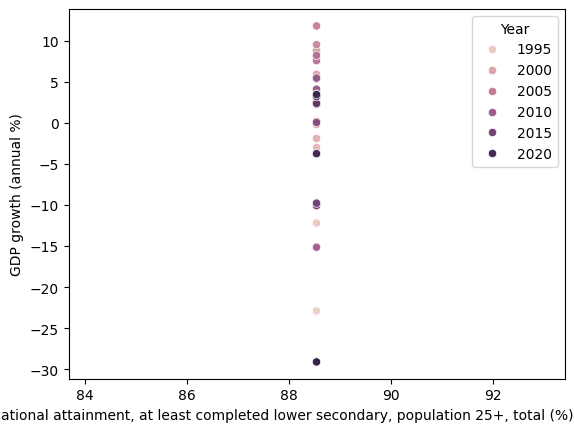

In [43]:
sns.scatterplot(x="Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)",y='GDP growth (annual %)',hue='Year',data=selected_ukraine_data)

<Axes: xlabel='Year', ylabel='GDP growth (annual %)'>

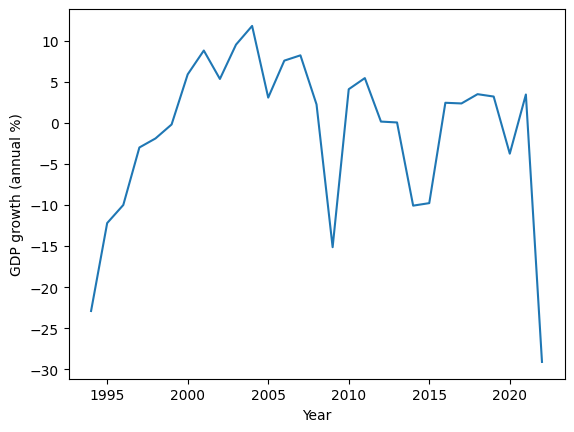

In [44]:
sns.lineplot(data=selected_ukraine_data, x="Year", y="GDP growth (annual %)")

In [45]:
# sns.pairplot(data = selected_ukraine_data, height = 2)  

In [46]:
import numpy as np
print(columns)

def make_regression_columns(columns: list, excluded_cols: list) -> list:
    cols = columns
    for col in excluded_cols:
        print(col)
        cols.remove(col)
    return cols

regression_columns = make_regression_columns(columns, ["Year", "GDP growth (annual %)"])
print(regression_columns)
selected_ukraine_data['GDP growth (annual %)'] = selected_ukraine_data['GDP (constant 2015 US$)'].pct_change() * 100 
selected_ukraine_data["GDP (constant 2015 US$)"] = np.log(selected_ukraine_data["GDP (constant 2015 US$)"])


['Year', 'GDP growth (annual %)', 'GDP (constant 2015 US$)', 'Portfolio investment, net (BoP, current US$)', 'Inflation, consumer prices (annual %)', 'Unemployment, total (% of total labor force) (national estimate)', 'Population growth (annual %)', 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)']
Year
GDP growth (annual %)
['GDP (constant 2015 US$)', 'Portfolio investment, net (BoP, current US$)', 'Inflation, consumer prices (annual %)', 'Unemployment, total (% of total labor force) (national estimate)', 'Population growth (annual %)', 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)']


/tmp/ipykernel_1924617/1319361368.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  selected_ukraine_data['GDP growth (annual %)'] = selected_ukraine_data['GDP (constant 2015 US$)'].pct_change() * 100
/tmp/ipykernel_1924617/1319361368.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ukraine_data['GDP growth (annual %)'] = selected_ukraine_data['GDP (constant 2015 US$)'].pct_change() * 100
/tmp/ipykernel_1924617/1319361368.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [47]:
mean_value = selected_ukraine_data["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].mean() 
selected_ukraine_data["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].fillna(value=mean_value, inplace=True)
mean_value = selected_ukraine_data["Unemployment, total (% of total labor force) (national estimate)"].mean() 
selected_ukraine_data["Unemployment, total (% of total labor force) (national estimate)"].fillna(value=mean_value, inplace=True)
selected_ukraine_data[regression_columns]
selected_ukraine_data = selected_ukraine_data.tail(6)
selected_ukraine_data.reset_index(drop=True, inplace = True)
selected_ukraine_data = selected_ukraine_data.head(5)
selected_ukraine_data

/tmp/ipykernel_1924617/564654054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_ukraine_data["Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"].fillna(value=mean_value, inplace=True)
/tmp/ipykernel_1924617/564654054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ukr

,Year,GDP growth (annual %),GDP (constant 2015 US$),"Portfolio investment, net (BoP, current US$)","Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (national estimate)",Population growth (annual %),"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,2018,3.488362,25.316197,-2080000000,10.951856,8.799,-0.466426,88.543221
1,2019,3.199504,25.347691,-5134000000,7.886717,8.194,-0.530994,88.543221
2,2020,-3.752804,25.30944,829000000,2.732492,9.475,-0.574242,88.543221
3,2021,3.445626,25.343316,-1024000000,9.363139,9.834,-0.702972,88.543221
4,2022,-29.1,24.999416,2026000000,20.183637,8.729296,-14.257037,88.543221


In [48]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

In [52]:
y = selected_ukraine_data[ 'GDP growth (annual %)']
X = selected_ukraine_data[regression_columns]
# Combining X and y into a single DataFrame
combined_data = X.copy()  # Creating a copy of X
combined_data['GDP growth (annual %)'] = y  # Adding y as a new column
# Drop rows with any NaN value from combined_data
combined_data_dropped = combined_data.dropna(how='any')

# Separate features (X) and target variable (y) from combined_data_dropped
X = combined_data_dropped.drop(columns='GDP growth (annual %)')
y = combined_data_dropped['GDP growth (annual %)']
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=50) 

In [53]:
# creating a regression model 
model = LinearRegression() 
  
# fitting the model 
model.fit(X_train, y_train) 
  
# making predictions 
predictions = model.predict(X_test) 


# model evaluation 
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 
print(f"The value of R^2 for the model is {model.score(X,y)*100} %")

mean_squared_error :  4.373841260183551
mean_absolute_error :  2.091373056196228
The value of R^2 for the model is 99.44770403896244 %


In [51]:
print(f"The intercept is given by {model.intercept_}")

coeffecients = model.coef_
for index, col in enumerate(regression_columns):
    print(f"The value of slope for {col} is given by {coeffecients[index]}")


The intercept is given by -16.81653495727632
The value of slope for GDP (constant 2015 US$) is given by 0.029306127921275793
The value of slope for Portfolio investment, net (BoP, current US$) is given by 1.2278755755212867e-09
The value of slope for Inflation, consumer prices (annual %) is given by 1.3824576212113213
The value of slope for Unemployment, total (% of total labor force) (national estimate) is given by 0.7825019190532357
The value of slope for Population growth (annual %) is given by -0.1956318369272421
The value of slope for Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative) is given by -7.313402217636016e-24
